In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [2]:
dp = 'data/Tinder.csv'
df = pd.read_csv(dp,header=0)
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Quite the opener,4,zphc1f,https://i.redd.it/r16iiif3lt6a1.jpg,0,1.671422e+09,NaN,2022-12-19 06:00:55
1,What do I reply to this? i feel this conversat...,3,zphasi,https://i.redd.it/6ibxax3vkt6a1.jpg,2,1.671422e+09,NaN,2022-12-19 05:59:36
2,Girl asked in her profile for my favorite colo...,0,zph5sn,https://i.redd.it/jy8gxxaljt6a1.jpg,8,1.671422e+09,NaN,2022-12-19 05:52:29
3,"What girls do I swipe right on, on tinder???",1,zph555,https://www.reddit.com/r/Tinder/comments/zph55...,3,1.671422e+09,Should I just auto swipe left if a girl just h...,2022-12-19 05:51:37
4,hopefully she's not a hitman,5,zpgtgf,https://i.redd.it/vwubnqijgt6a1.png,0,1.671421e+09,NaN,2022-12-19 05:35:23


-Need to do a sort of sentiment analysis like with word vectorization
-Load in other data things


In [3]:
tinder_data = df[['title', 'score', 'comms_num', 'body', 'timestamp']]
tinder_data.iloc[5]

title        Thought I’d share the line that that got my gi...
score                                                       16
comms_num                                                    5
body                                                       NaN
timestamp                                  2022-12-19 05:14:21
Name: 5, dtype: object

https://www.kaggle.com/code/mehmetlaudatekman/tutorial-word-embeddings-with-svm

In [4]:
shower_dp = 'data/Showerthoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
shower_data.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN


In [5]:
shower_data.columns

Index(['created_utc', 'score', 'domain', 'id', 'title', 'ups', 'downs',
       'num_comments', 'permalink', 'selftext', 'link_flair_text', 'over_18',
       'thumbnail', 'subreddit_id', 'edited', 'link_flair_css_class',
       'author_flair_css_class', 'is_self', 'name', 'url', 'distinguished'],
      dtype='object')

In [6]:
shower_data = shower_data.drop(['domain', 'id','permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'thumbnail', 'name', 'url', 'link_flair_text','distinguished'], axis='columns')
shower_data.columns

Index(['created_utc', 'score', 'title', 'ups', 'downs', 'num_comments',
       'selftext', 'subreddit_id', 'edited', 'is_self'],
      dtype='object')

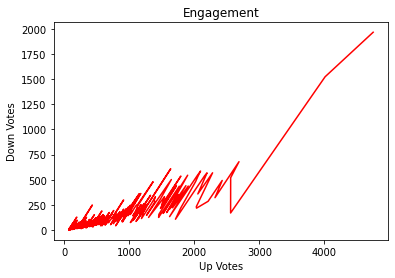

In [7]:
plt.plot(shower_data['ups'], shower_data['downs'],color="r")
plt.xlabel("Up Votes")
plt.ylabel("Down Votes")
plt.title("Engagement")
plt.show()

In [8]:
shower_data["engagement"] = shower_data["ups"] + shower_data["downs"] + shower_data["num_comments"]

In [9]:
shower_data

,created_utc,score,title,ups,downs,num_comments,selftext,subreddit_id,edited,is_self,engagement
0,1.372964e+09,2785,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,NaN,t5_2szyo,False,True,6980
1,1.372606e+09,2488,I am just a penis. The rest of me is just ther...,4011,1523,162,NaN,t5_2szyo,False,True,5696
2,1.361920e+09,2387,A TV channel where all the shows are set in th...,2558,171,77,"You could have crime drama's, sitcoms, science...",t5_2szyo,False,True,2806
3,1.370793e+09,2038,If the oldest person on earth is 116 years old...,2559,521,71,NaN,t5_2szyo,False,True,3151
4,1.371846e+09,2007,"If Kanye and Kim's child's name is North West,...",2687,680,76,NaN,t5_2szyo,False,True,3443
...,...,...,...,...,...,...,...,...,...,...,...
995,1.376188e+09,66,Deaf people using captions to watch TV have no...,75,9,9,because they have no perception of sound or mu...,t5_2szyo,False,True,93
996,1.375852e+09,64,I wonder how much ink I've saved through my li...,76,12,7,NaN,t5_2szyo,False,True,95
997,1.374782e+09,65,Everyone I've ever known has probably cried th...,70,5,14,NaN,t5_2szyo,False,True,89
998,1.374438e+09,62,Wouldn't it be more logical to restart the yea...,75,13,12,It's true that having very large numbers for y...,t5_2szyo,False,True,100


In [10]:
features = shower_data[['created_utc', 'score', 'title', 'downs', 'num_comments',
       'selftext', 'subreddit_id', 'edited', 'is_self']]
targets = shower_data['ups']


X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [11]:
import nltk
from nltk.tokenize import word_tokenize

In [12]:
nltk.download(['punkt', "names", "stopwords", "averaged_perceptron_tagger", "vader_lexicon"])

[nltk_data] Downloading package punkt to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/DAVIDSON/branthony/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:

trial = shower_data['title']
tokens = trial.apply(lambda x: word_tokenize(x))
#tokenizing all of the 'title' column, need to now vectorize them// word embeddings

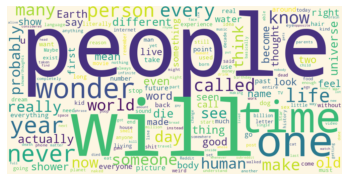

In [14]:
# !pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# fd = {
#     'fontsize': '32',
#     'fontweight' : 'normal',
#     'verticalalignment': 'baseline',
#     'horizontalalignment': 'center',
# }


# Start with one review:
text = ""
for i in range(len(shower_data['title'])):
    text+= shower_data['title'][i]
# print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000, height=500, collocations=False, 
                             background_color="#fdf6e3", max_words=200).generate_from_text(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords.append(".")
stopwords.append(",")

#Cleaning out stopwords
clean = []



for sent in tokens:
    new_sent = []
    for word in sent:
        if word.lower() not in stopwords:
            new_sent.append(word)
    clean.append(new_sent)


    
# clean           

In [30]:
#making one hot word array - getting all non stop words 
# text_all = text.split()
titles = shower_data['title']
titles_tokens = trial.apply(lambda x: word_tokenize(x))
clean_text_all = []
max = 0 
for row in titles_tokens:
    if len(row)>max:
        max = len(row)
    for word in row:
        if word.lower() not in stopwords:
            clean_text_all.append(word)
        
# making word dict 
oh_dict={}
index = 0 
for word in clean_text_all:
    if word not in oh_dict:
        oh_dict[word.lower()] = index 
        index+=1 




In [32]:
new_tokens = tokens 
titles_tokens = trial.apply(lambda x: word_tokenize(x))
count = 0
for row in new_tokens:
    new_row = []
    for word in range(len(row)):
        print(row[word])
        if row[word].lower() not in oh_dict:
            if row[word].lower() not in stopwords:
                new_row.append(oh_dict[row[word].lower()])
    new_tokens[count] = new_row
    count+=1

# print(new_tokens)


In [ ]:
oh_tokens = []



for word in new_tokens:
    new_sent = []
    for word in sent:
        if word.lower() not in stopwords:
            new_sent.append(word)
    clean.append(new_sent)

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_words = get_all_words(clean)
print(type(all_words))

In [ ]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_words)
print(freq_dist_pos.most_common(10))

In [ ]:
import nltk.sentiment 

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_to_df(titles):
    neg = []
    neu = []
    pos = []
    for t in titles:
        scores = sia.polarity_scores(t)
        neg.append(scores['neg'])
        neu.append(scores['neu'])
        pos.append(scores['pos'])
        
    return neg, neu, pos

In [ ]:
neg, neu, pos = sentiment_to_df(shower_data['title'])
shower_data['neg'] = neg
shower_data['neu'] = neu
shower_data['pos'] = pos
shower_data
#TF-IDF

In [ ]:
features = shower_data[['neg', 'neu', 'pos']]
targets = shower_data['ups']


X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(features)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
print("MSE is",MSE)